<a href="https://colab.research.google.com/github/YJJasdasdasd/deeplearning/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 깃허브에서  준비된 데이터 가져오기기
!git clone https://github.com/taehojo/data-ch20.git

fatal: destination path 'data-ch20' already exists and is not an empty directory.


In [37]:
# 학습셋의 변형을 설정
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,     
                                   width_shift_range=0.1,    
                                   height_shift_range=0.1,   
                                   ) 
          
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')


Found 160 images belonging to 2 classes.


In [38]:
# 테스트셋의 정규화를 설정합니다.
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [39]:
# VGG16 모델을 불러옵니다.
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False

In [41]:
# 우리의 모델을 설정합니다.
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                524352    
                                                                 
 activation_8 (Activation)   (None, 64)                0         
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
 activation_9 (Activation)   (None, 1)                

In [42]:
# 모델의 실행 옵션을 설정합니다.
finetune_model.compile(loss='binary_crossentropy', 
                       optimizer=optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

In [43]:
# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=5)

In [44]:
# 모델을 실햅합니다.
history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10, 
       callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 52s 2s/step - loss: 0.7236 - accuracy: 0.5063 - val_loss: 0.5512 - val_accuracy: 0.8400
Epoch 2/20
32/32 [==============================] - 80s 3s/step - loss: 0.5374 - accuracy: 0.7375 - val_loss: 0.4965 - val_accuracy: 0.8200
Epoch 3/20
32/32 [==============================] - 67s 2s/step - loss: 0.4916 - accuracy: 0.7750 - val_loss: 0.3392 - val_accuracy: 0.9800
Epoch 4/20
32/32 [==============================] - 75s 2s/step - loss: 0.4213 - accuracy: 0.8625 - val_loss: 0.3547 - val_accuracy: 0.9200
Epoch 5/20
32/32 [==============================] - 48s 2s/step - loss: 0.3593 - accuracy: 0.8625 - val_loss: 0.3761 - val_accuracy: 0.9200
Epoch 6/20
32/32 [==============================] - 50s 2s/step - loss: 0.3274 - accuracy: 0.8938 - val_loss: 0.2997 - val_accuracy: 0.8600
Epoch 7/20
32/32 [==============================] - 48s 2s/step - loss: 0.3107 - accuracy: 0.8625 - val_loss: 0.2836 - val_accuracy: 0.8800
Epoch 8/20
32/32 [==

In [47]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

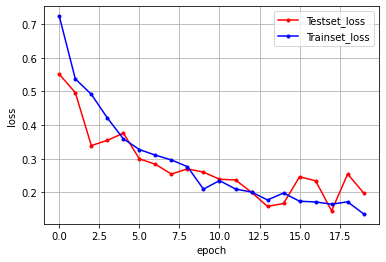

In [48]:
# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()